# Banking Customer Churn
Understanding Customer Behavior and Predicting Churn in Banking Institutions

The data commes from: [Banking Customer Churn Prediction Dataset](https://www.kaggle.com/datasets/saurabhbadole/bank-customer-churn-prediction-dataset) on kaggle.com  


### Data dictionary (Features of each customer)

**RowNumber:** The sequential number assigned to each row in the dataset.

**CustomerId:** A unique identifier for each customer.

***Surname:*** The surname of the customer.

***CreditScore:*** The credit score of the customer.

***Geography:*** The geographical location of the customer (e.g., country or region).

***Gender:*** The gender of the customer.

***Age:*** The age of the customer.

***Tenure:*** The number of years the customer has been with the bank.

***Balance:*** The account balance of the customer.

***NumOfProducts:*** The number of bank products the customer has.

***HasCrCard:*** Indicates whether the customer has a credit card (binary: yes/no).

***IsActiveMember:*** Indicates whether the customer is an active member (binary: yes/no).

***EstimatedSalary:*** The estimated salary of the customer.

***Exited:*** Indicates whether the customer has exited the bank (binary: **yes = 1 / no = 0**).

In [21]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# setting maximal number of displayed columnes
pd.set_option('display.max_columns', 20)

# read data
df = pd.read_csv("../data/raw/Churn_Modelling.csv")
display(df.head(10))

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [22]:
#deleting unnecessary column
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [23]:
#checking datatypes
display(df.dtypes)

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [24]:
# changing data types
# List of columns to be converted to 'category' type
category_columns = ['Geography',
                    'Gender',
                    'HasCrCard',
                    'IsActiveMember',
                    'Exited']

# Convert each of above columns to 'category' type
for column in category_columns:
    df[column] = df[column].astype('category')

In [25]:
#checking datatypes after changes
display(df.dtypes)

CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited             category
dtype: object

,Retainers,Churners
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


,Retainers,Churners
Geography,,
France,83.85%,16.15%
Germany,67.56%,32.44%
Spain,83.33%,16.67%


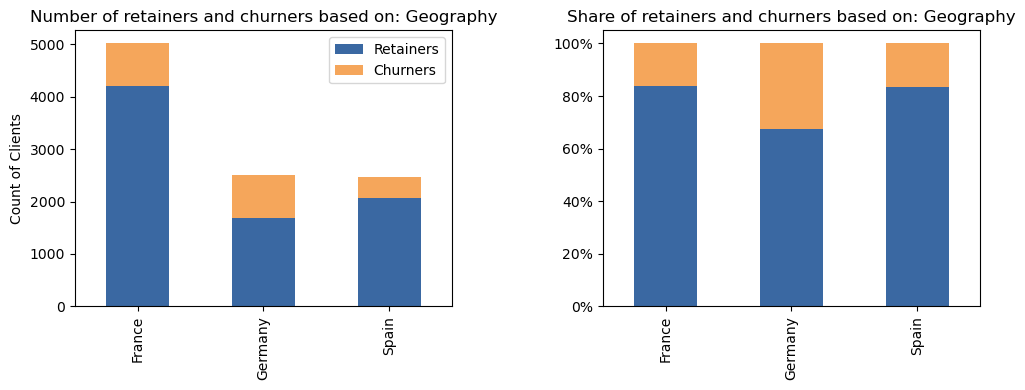

,Retainers,Churners
Gender,,
Female,3404,1139
Male,4559,898


,Retainers,Churners
Gender,,
Female,74.93%,25.07%
Male,83.54%,16.46%


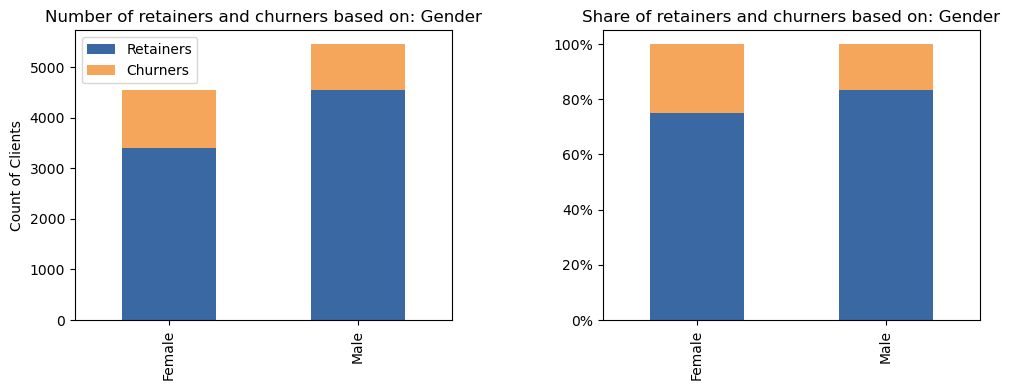

,Retainers,Churners
HasCrCard,,
0,2332,613
1,5631,1424


,Retainers,Churners
HasCrCard,,
0,79.19%,20.81%
1,79.82%,20.18%


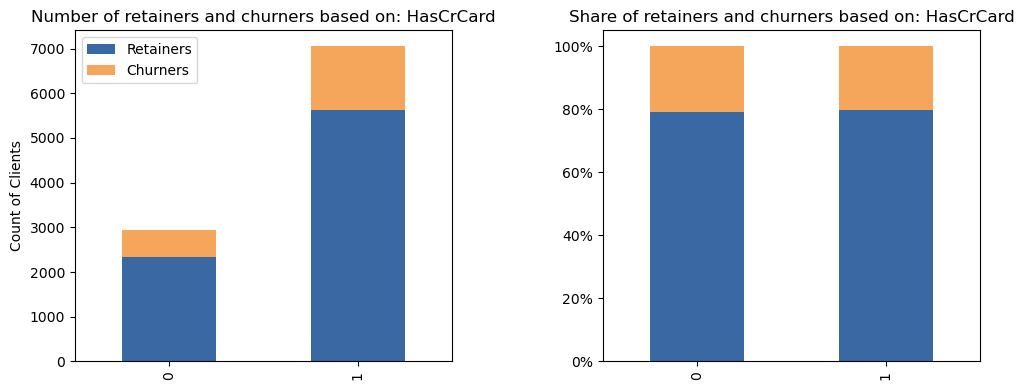

,Retainers,Churners
IsActiveMember,,
0,3547,1302
1,4416,735


,Retainers,Churners
IsActiveMember,,
0,73.15%,26.85%
1,85.73%,14.27%


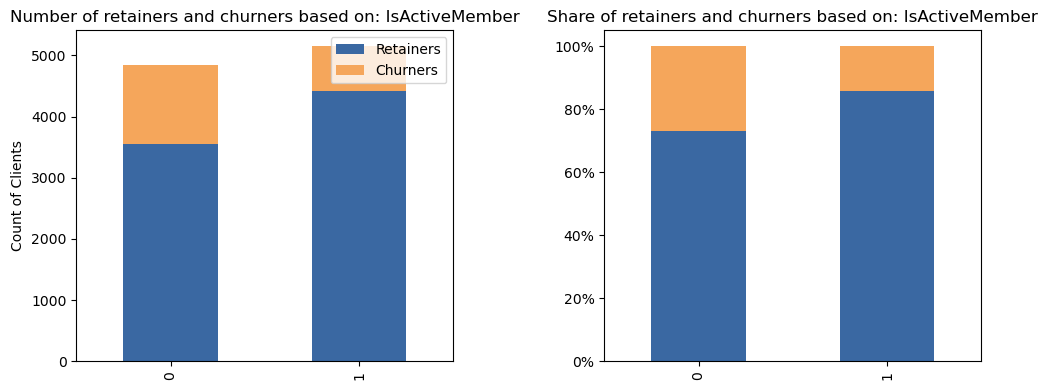

,Retainers,Churners
NumOfProducts,,
1,3675,1409
2,4242,348
3,46,220
4,0,60


,Retainers,Churners
NumOfProducts,,
1,72.29%,27.71%
2,92.42%,7.58%
3,17.29%,82.71%
4,0.00%,100.00%


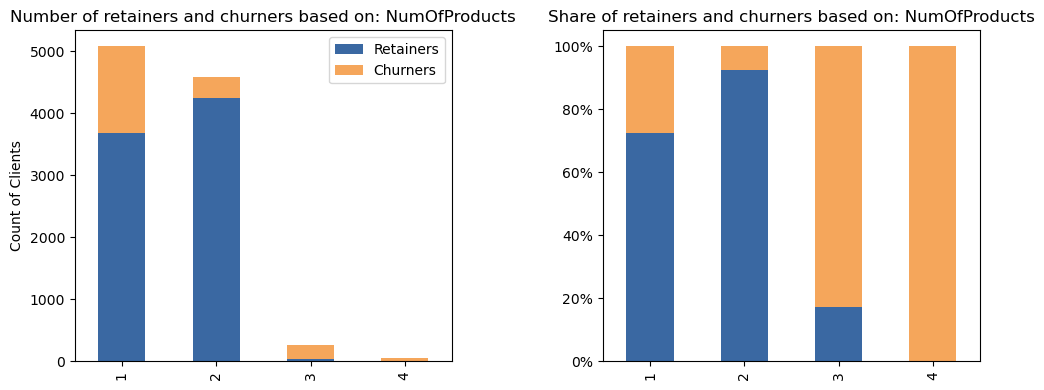

In [26]:
# Analyzing customer churn based on categorical features and NumOfProducts


from matplotlib.ticker import PercentFormatter

selected_features = ['Geography',
                    'Gender',
                    'HasCrCard',
                    'IsActiveMember',
                    'NumOfProducts']

for feature in selected_features:
    
    # creating crosstab
    Category_crosstab = pd.crosstab(df[feature], df['Exited'])
    Category_crosstab.columns = ['Retainers', 'Churners']
    display(Category_crosstab)

    # Creating crosstab with normalization
    Category_crosstab_norm = pd.crosstab(df[feature], df['Exited'], normalize='index')
    Category_crosstab_norm = Category_crosstab_norm.map(lambda x: f'{x:.2%}') # float into str
    Category_crosstab_norm.columns = ['Retainers', 'Churners']
    display(Category_crosstab_norm)


    # Creating the figure and two axes
    fig, axes = plt.subplots(1, 2, figsize=(10, 4)) 

    # Subplot 1- clients count
    Category_crosstab.reset_index().plot(
        kind='bar',
        x=feature,
        stacked=True,
        color=['#3a68a2', '#f5a65b'],
        legend=True,
        ax=axes[0]  # Setting on the first plot
    )
    axes[0].set_title('Number of retainers and churners based on: {}'.format(feature))
    axes[0].set_xlabel(None)
    axes[0].set_ylabel('Count of Clients')

    # Subplot 2- clients share
    Category_crosstab_norm = Category_crosstab_norm.map(lambda x: float(x.strip('%')) / 100) # str into float
    Category_crosstab_norm.reset_index().plot(
        kind='bar',
        x=feature,
        stacked=True,
        color=['#3a68a2', '#f5a65b'],
        legend=False,
        ax=axes[1]  # Setting on the secound plot
    )
    axes[1].set_title('Share of retainers and churners based on: {}'.format(feature))
    axes[1].set_xlabel(None)
    axes[1].yaxis.set_major_formatter(PercentFormatter(1))

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.4) 
    plt.show()

### Conclusions
- All of the clients having 4 products are churners
- over 80 % of the clients having 3 products are churners
- the country in share of churners is highest is Germany
- activ customers tend to leve the bank less likely than the inactive customers 

In [27]:
# read statistics
display(df.describe().round(2))

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,650.53,38.92,5.01,76485.89,1.53,100090.24
std,96.65,10.49,2.89,62397.41,0.58,57510.49
min,350.00,18.00,0.00,0.00,1.00,11.58
25%,584.00,32.00,3.00,0.00,1.00,51002.11
50%,652.00,37.00,5.00,97198.54,1.00,100193.92
75%,718.00,44.00,7.00,127644.24,2.00,149388.25
max,850.00,92.00,10.00,250898.09,4.00,199992.48


In [28]:
#checking Nans
print("\nNaN values per column:")
display(df.isna().sum())


NaN values per column:


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [29]:
#checking duplicates

duplicates = df.duplicated()
duplicate_count = duplicates.sum()
print('Number of duplicate rows:', duplicate_count)

Number of duplicate rows: 0


In [30]:
# checking unique values per column
print('Unique values per column:\n\n', df.nunique())

Unique values per column:

 CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64


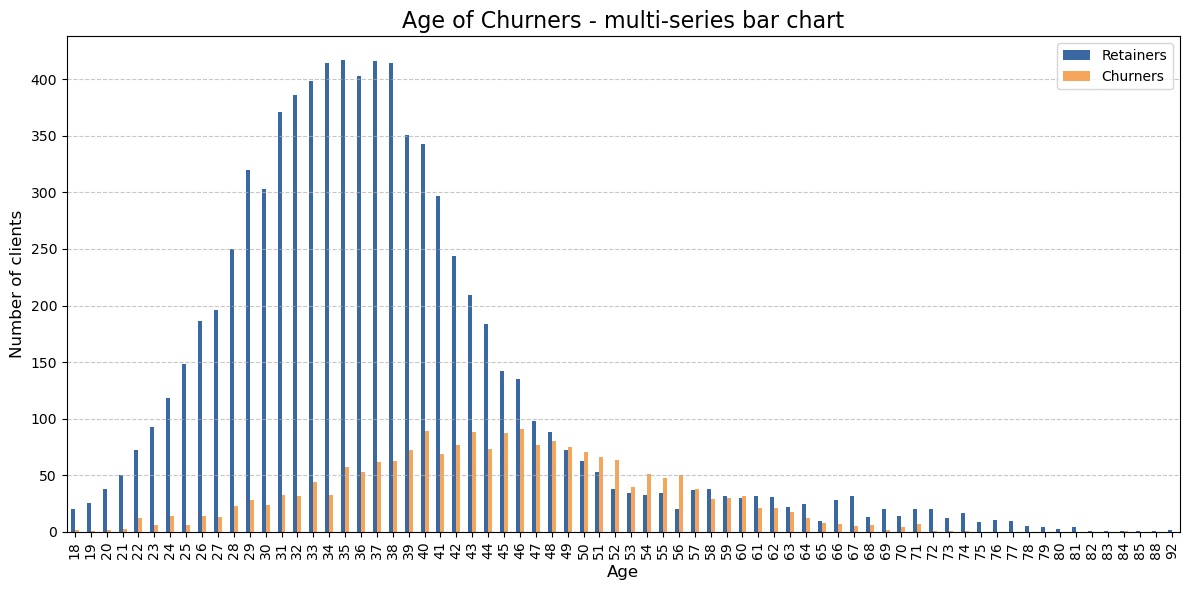

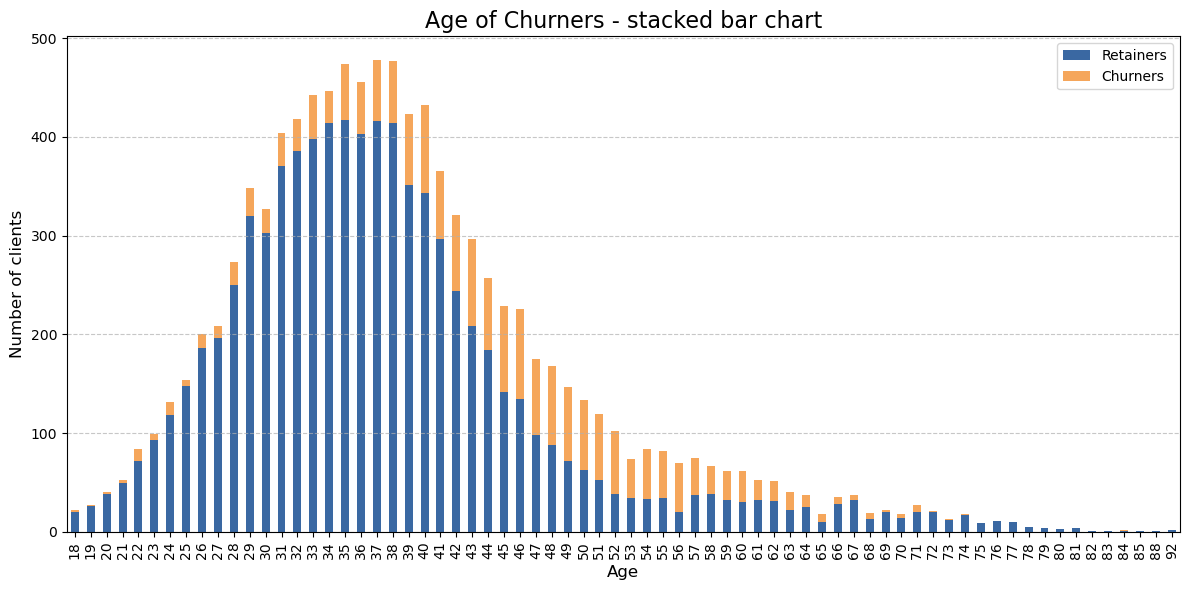

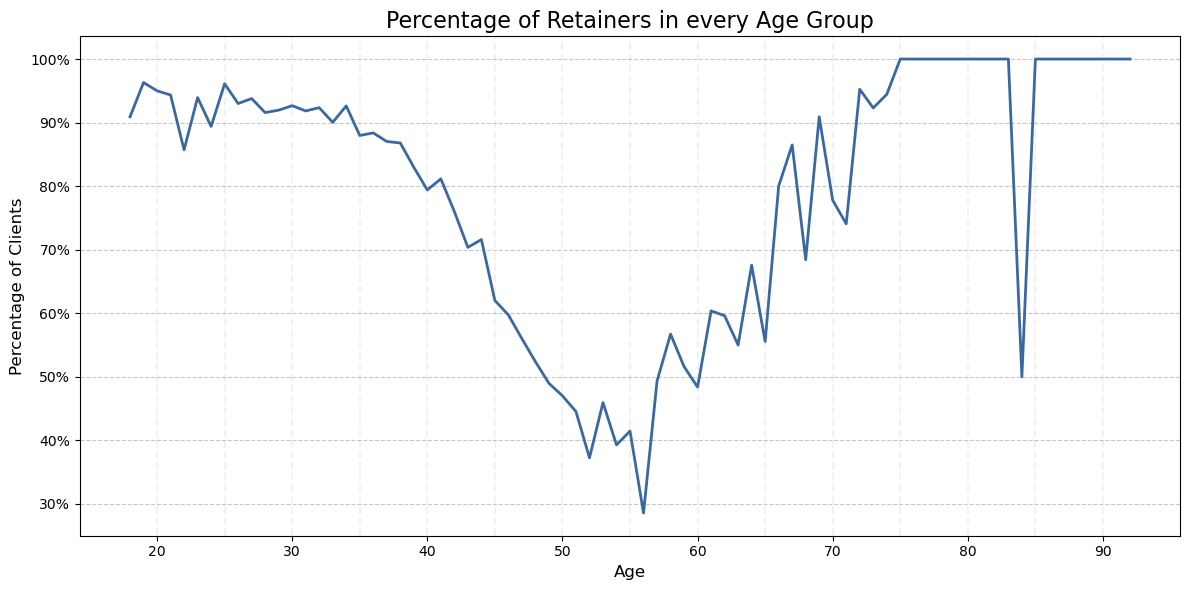

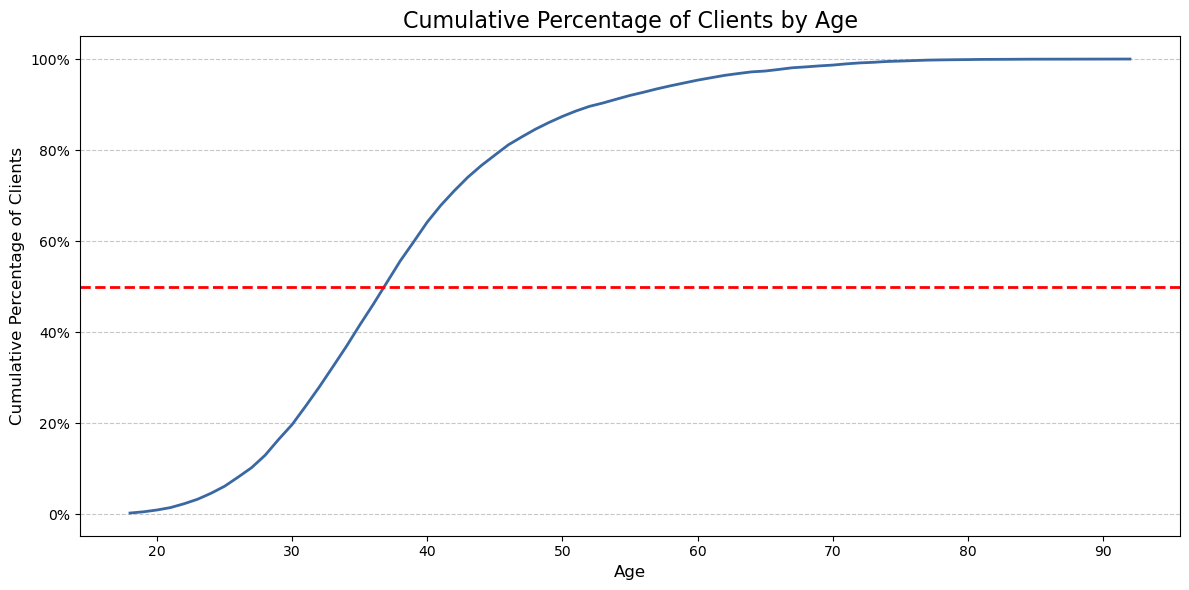

In [31]:
# Selective analysis of features: Age

# Grouping data
grouped = df.groupby(['Age', 'Exited'], observed=True).size().unstack(fill_value=0)

# Creating plot 1
grouped.plot(
    kind='bar', 
    stacked=False, 
    figsize=(12, 6), 
    color=['#3a68a2', '#f5a65b']
)
plt.title('Age of Churners - multi-series bar chart', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of clients', fontsize=12)
plt.legend(['Retainers', 'Churners'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Creating plot 2
grouped.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 6), 
    color=['#3a68a2', '#f5a65b']
)
plt.title('Age of Churners - stacked bar chart', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of clients', fontsize=12)
plt.legend(['Retainers', 'Churners'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Creating plot 3

# Normalize the data to show percentages
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Creating line plot for percentage of Retainers
ax = grouped_percentage[0].plot(
    kind='line',  # Line plot for Retainers (Exited=0)
    figsize=(12, 6), 
    color='#3a68a2', 
    linewidth=2
)

# Adding title and labels
plt.title('Percentage of Retainers in every Age Group', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Percentage of Clients', fontsize=12)

# Formatting the y-axis as percentage
ax.yaxis.set_major_formatter(PercentFormatter(100))

# Adding dashed vertical lines at every 5 units on the x-axis
for i in range(20, max(grouped_percentage.index), 5):
    plt.axvline(x=i, color='gray', linestyle='--', alpha=0.1)
# Adding grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout
plt.tight_layout()

# Display plot
plt.show()


# Creating Plot 4

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Grouping data by age
age_grouped = df.groupby('Age').size()

# Normalize the data to get percentages
age_percentage = age_grouped / age_grouped.sum() * 100

# Calculate cumulative percentage
cumulative_percentage = age_percentage.cumsum()

# Creating the cumulative percentage plot
plt.figure(figsize=(12, 6))
cumulative_percentage.plot(kind='line', color='#3a68a2', linewidth=2)

# Adding title and labels
plt.title('Cumulative Percentage of Clients by Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Cumulative Percentage of Clients', fontsize=12)

# Format the y-axis as percentage
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))

# Adding grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding a horizontal dashed line at 50%
plt.axhline(y=50, color='red', linestyle='--', linewidth=2)

# Tight layout
plt.tight_layout()

# Display plot
plt.show()




In [32]:
# Calculating the boundary age for the youngest 50% of clients
boundary_age = df['Age'].quantile(0.5)

# Displaying the boundary age
print(f'Boundary age for the youngest 50% of clients: {boundary_age}')

Boundary age for the youngest 50% of clients: 37.0


### Conclusions
- Boundary age for the youngest 50% of clients: 37
- After the age of 37, the share of retainers declines significantly
- Customers of age between 49 and 57 are mostly churners
- Groups of customers older than 60 are mostly retainers, however, their numbers are not large.

### Analysing distribution of the numerical features

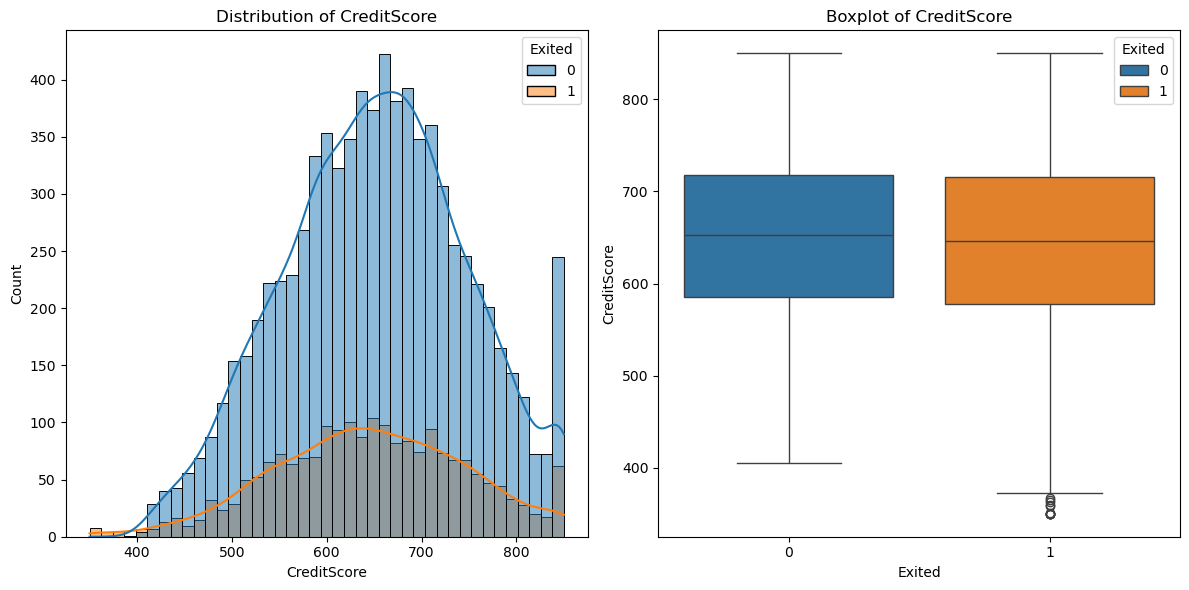

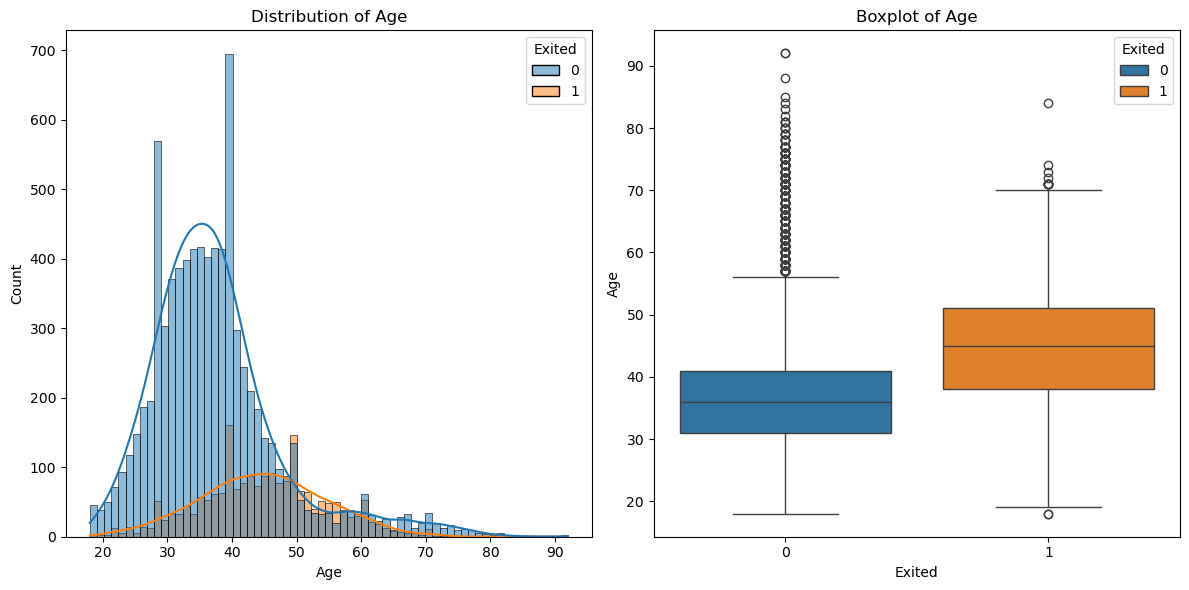

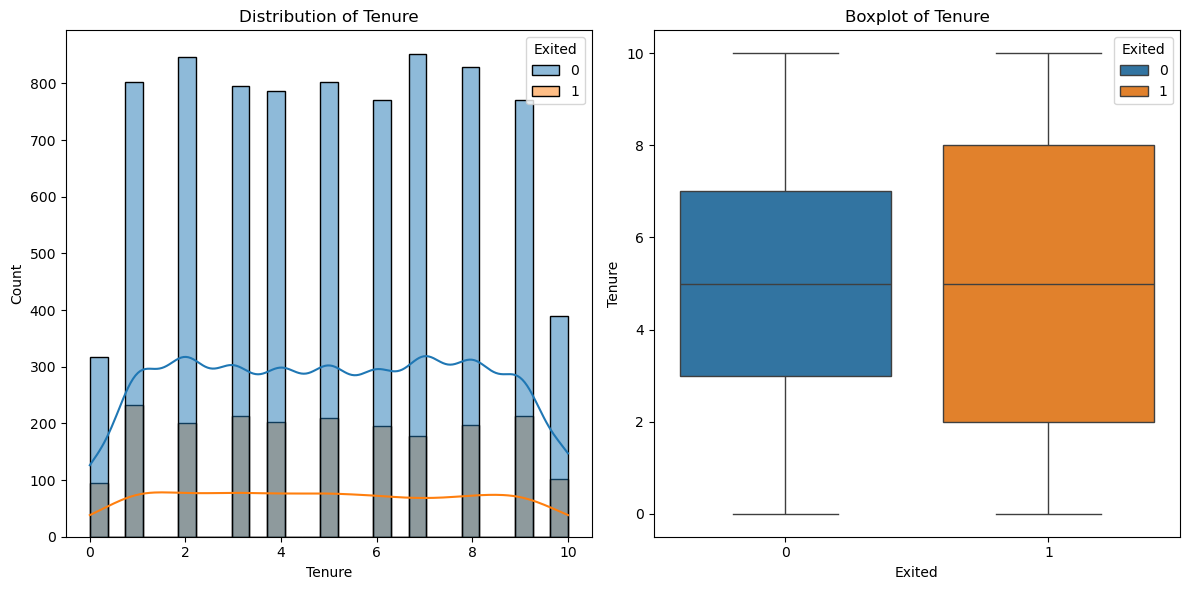

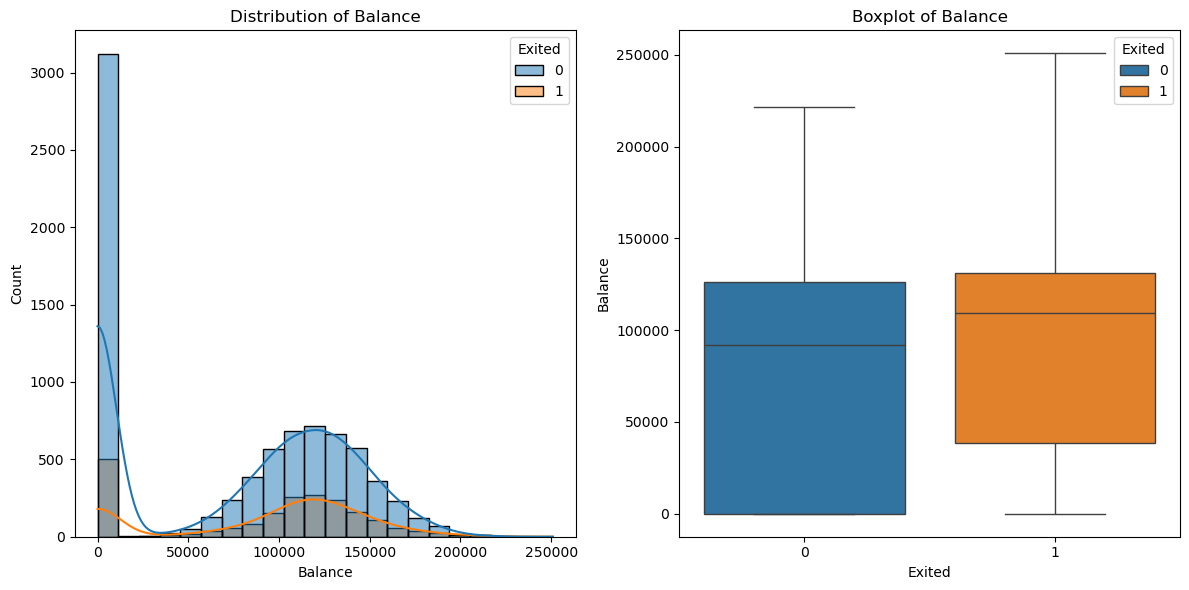

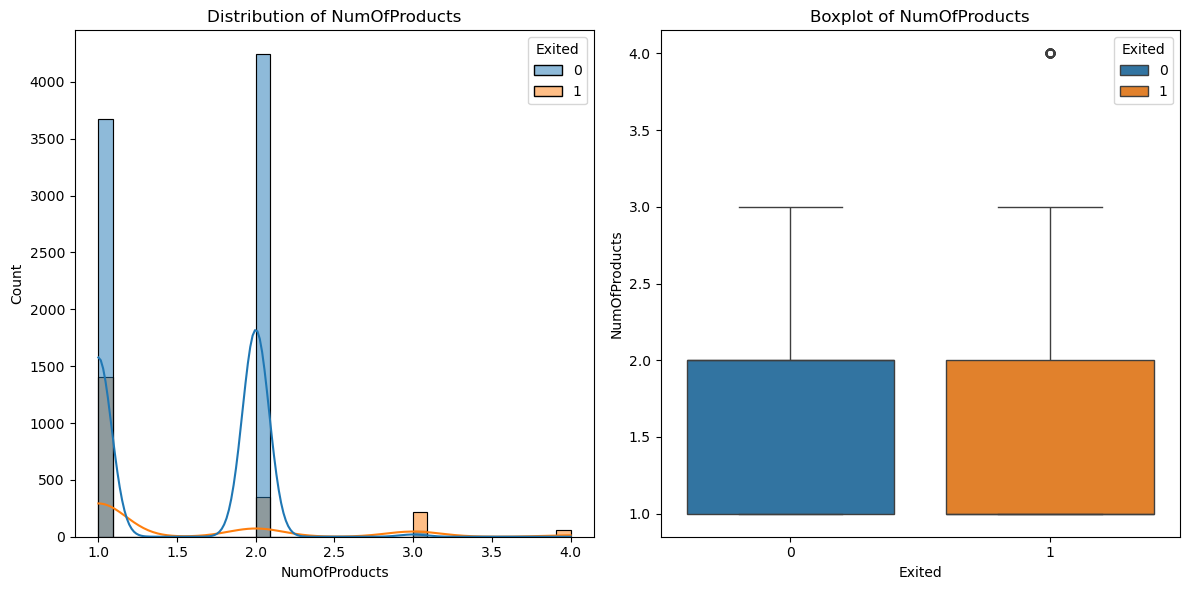

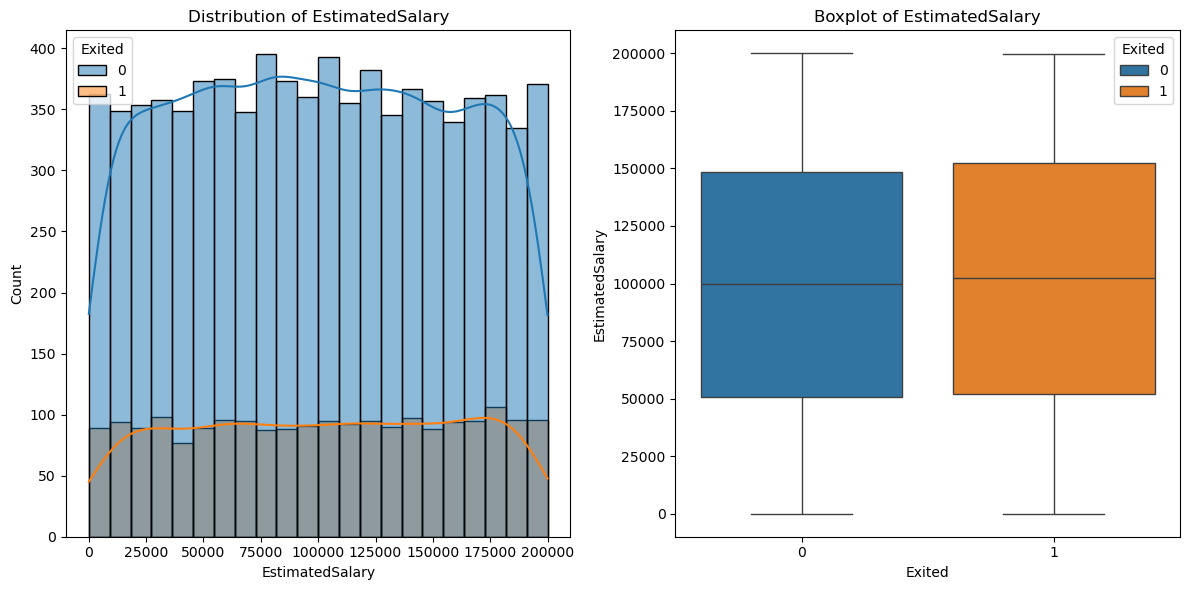

In [33]:
# Distribution of the numerical columnes

# Selection of numerical columns
df_numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Visualization of distributions
for column in df_numeric_columns:
    plt.figure(figsize=(12, 6))
    
    # Distribution with distplot
    plt.subplot(1, 2, 1) # one row, two columns, first column from the left
    sns.histplot(data=df, x=column, kde=True, hue='Exited')
    #sns.histplot(features_with_target[column], kde=True, hue='Exited'  )
    plt.title(f'Distribution of {column}')
    
    # Boxplot to identify outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(x='Exited', y=df[column], data=df, hue='Exited')
    #sns.boxplot(x=features_with_target[column], hue='Exited')
    plt.title(f'Boxplot of {column}')
    
    plt.tight_layout()
    plt.show()


### Conclusions:
- The estimated salary is generally evenly distributed between 0 and 200,000 (the currency type was not specified).
- A similar pattern can be observed for tenure, suggesting that this feature alone does not significantly influence customer churn.
- The distribution of account balance is approximately normal with a mean around 120,000, along with an additional secondary peak near 0.
- The age distribution for both classes is approximately normal; however, the peaks differ — for retainers it's around 37 years old, while for churners it's closer to 45.
- Very few customers have 3 or 4 products.

### Handling Outliers:
- There are no significant outliers or impossible values in the dataset.

### Visualizing relationships between features with pairplot, categorized by churn status

In [34]:
# Creating pairplot

#pairplot = sns.pairplot(df, hue = 'Exited',diag_kws={'common_norm': True}) # Comment out this line and the next one
#pairplot.savefig('../results/figures/pairplot.png') # Comment out this line and the previous one

# To reduce execution time, you can comment out the two above code lines.
# Then, the image saved earlier will be loaded.
# You can also leave the code above as it is to check its functionality.
# approximate execution time: 59 sec

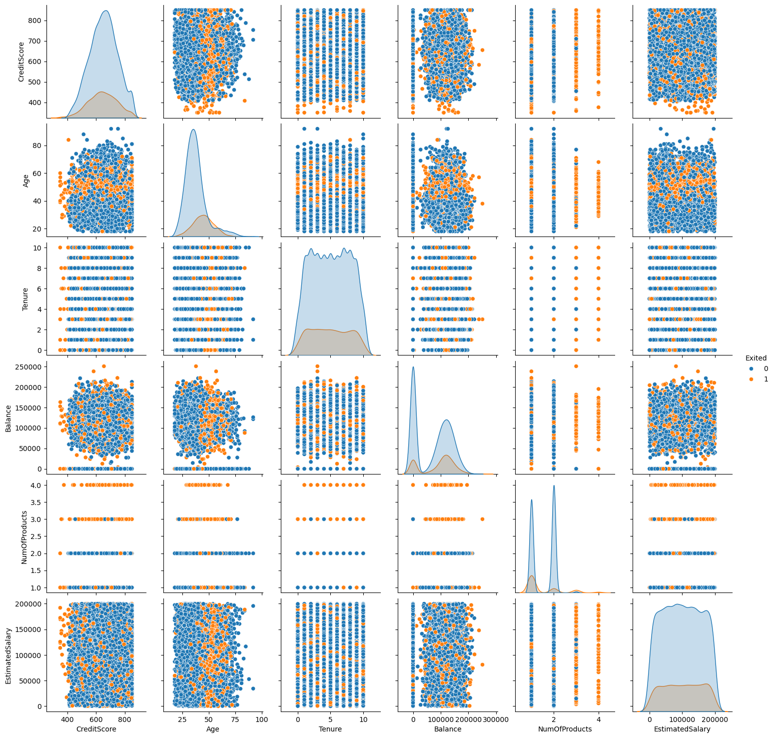

In [35]:
# Loading the pairplot image

from PIL import Image
img = Image.open('../results/figures/pairplot.png')
img_resized = img.resize((img.width // 2, img.height // 2))
display(img_resized)

### Conclusions
After the first glance, churn is mostly observed for:
- Age between 40 and 65
- Clients having of 3 and more products
- Clients of CreditScore of less than 400
        

### Correlations

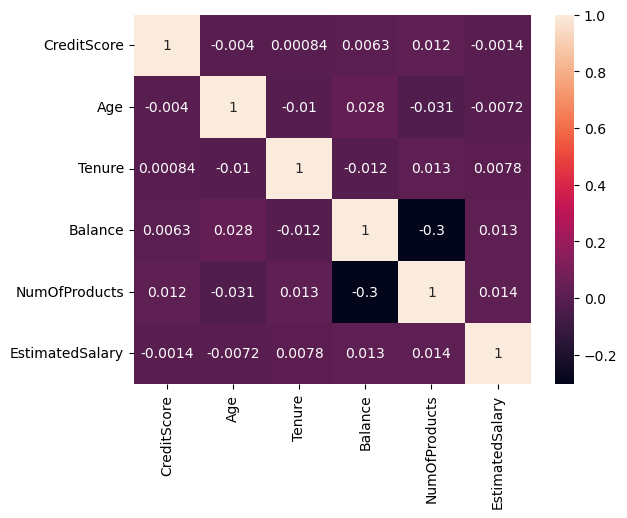

In [36]:
# Correlated features

# Selecting numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64', 'int8' ])

# Correlation visualization
sns.heatmap(numerical_df.corr(), annot=True);

In [37]:
numerical_df.corr().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.00,-0.00,0.00,0.01,0.01,-0.00
Age,-0.00,1.00,-0.01,0.03,-0.03,-0.01
Tenure,0.00,-0.01,1.00,-0.01,0.01,0.01
Balance,0.01,0.03,-0.01,1.00,-0.30,0.01
NumOfProducts,0.01,-0.03,0.01,-0.30,1.00,0.01
EstimatedSalary,-0.00,-0.01,0.01,0.01,0.01,1.00


### Conclusions
The correlations between numerical values are week. The highest is -0.30 between NumOfProducts and Balance.   
This is likely due to the fact that the dataset was **syntheticly created**.

## Checking the balance of the target categories

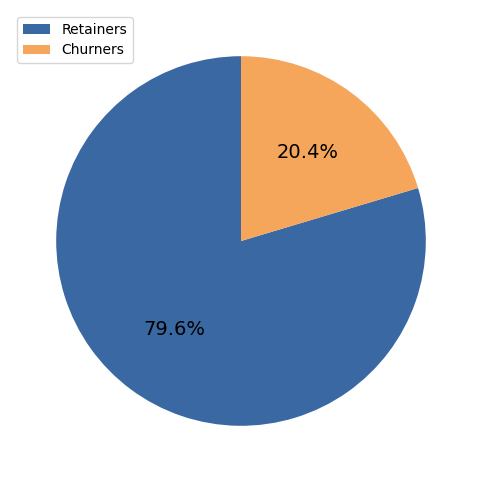

In [38]:
# target data
crosstab = pd.crosstab(index=df['Exited'], columns='count', normalize='columns')
pie_data = crosstab['count']  # transform the crosstab into a simple series for the pie chart
labels = ['Retainers', 'Churners']  # 0: Retainers, 1: Churners

# pie chart
plt.figure(figsize=(6, 6))
colors = ['#3a68a2', '#f5a65b']
plt.pie(
    pie_data, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors, 
    textprops={'fontsize': 14}
)
plt.legend(labels, loc="upper left")
plt.show()

### Summary of EDA

- The target classes (Exited) are significantly imbalanced (approximately 80% vs. 20%).
- There are no significant outliers or invalid values present in the dataset.
- Weak correlations between features may be a result of the dataset being synthetically generated.
- Customer age appears to be one of the most influential features in predicting churn.

In [ ]:
# Building a data cleaning function and saving it to an external script

function_code = """
import pandas as pd

def clean_data(df):
    \"\"\"Returns cleaned DataFrame.
    
    Processes:
        -removing irrelevant columns
        -transform data into less demanding formats
       
    Args: 
        df (pd.DataFrame) : uncleaned DataFrame
        
    Returns:
        df  (pd.DataFrame) : cleaned DataFrame
    
    \"\"\"

    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)

    # removing unnecessary columns
    df = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis=1)
    
    # convert 'object' to 'category' type
    category_columns = ['Geography']
    for column in category_columns:
        df[column] = df[column].astype('category')

    # convert 'object' to numerical columns
    df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

    # convert numerical columns: data type optimization
    df['Gender'] = df['Gender'].astype('uint8')
    df['HasCrCard'] = df['HasCrCard'].astype('uint8')
    df['IsActiveMember'] = df['IsActiveMember'].astype('uint8')
    df['Age'] = df['Age'].astype('uint8')
    df['Tenure'] = df['Tenure'].astype('uint8')
    df['NumOfProducts'] = df['NumOfProducts'].astype('uint8')
    df['CreditScore'] = df['CreditScore'].astype('uint16')
        
    return df
"""

# saving cleaning function to a CSV file
with open('../scripts/cleaning_functions.py', 'w') as file:
    file.write(function_code)


In [40]:
# perform train-test-split
df = pd.read_csv("../data/raw/Churn_Modelling.csv")

from sklearn.model_selection import train_test_split

target = df.loc[:,'Exited']
features = df.drop('Exited', axis=1)

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            random_state=42,
                                                                            test_size=0.1)

In [41]:
# saving the Split Data to CSV Files

features_train.to_csv('../data/processed/features_train.csv', index=False)
features_test.to_csv('../data/processed/features_test.csv', index=False)
target_train.to_csv('../data/processed/target_train.csv', index=False)
target_test.to_csv('../data/processed/target_test.csv', index=False)

In [42]:
# importing cleaning functions from external script

import sys
sys.path.append('../scripts')
from cleaning_functions import clean_data

# cleaning splited data
features_train_cleaned = clean_data(features_train)
features_test_cleaned = clean_data(features_test)

display(features_train_cleaned)
print(features_train_cleaned.info());

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
4896,605,France,0,41,5,91612.91,1,1,1,28427.84
4782,752,France,1,53,8,114233.18,1,1,1,51587.04
1496,569,Spain,0,38,8,0.00,2,0,0,79618.79
1957,710,France,0,54,6,171137.62,1,1,1,167023.95
9171,411,France,1,54,9,0.00,1,0,1,76621.49
...,...,...,...,...,...,...,...,...,...,...
5734,768,France,0,54,8,69712.74,1,1,1,69381.05
5191,682,France,1,58,1,0.00,1,1,1,706.50
5390,735,France,1,38,1,0.00,3,0,0,92220.12
860,667,France,0,43,8,190227.46,1,1,0,97508.04


<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, 4896 to 7270
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      9000 non-null   uint16  
 1   Geography        9000 non-null   category
 2   Gender           9000 non-null   uint8   
 3   Age              9000 non-null   uint8   
 4   Tenure           9000 non-null   uint8   
 5   Balance          9000 non-null   float64 
 6   NumOfProducts    9000 non-null   uint8   
 7   HasCrCard        9000 non-null   uint8   
 8   IsActiveMember   9000 non-null   uint8   
 9   EstimatedSalary  9000 non-null   float64 
dtypes: category(1), float64(2), uint16(1), uint8(6)
memory usage: 290.2 KB
None


In [43]:
 # defining function resample_data()

def resample_data(x, y):
    from imblearn.over_sampling import RandomOverSampler
    ros = RandomOverSampler(random_state=42)
    features_resampled, target_resampled = ros.fit_resample(x, y)
    pd.crosstab(index=target_resampled,
            columns='count')
    return  features_resampled, target_resampled 

In [44]:
# applying function resample_data()
features_train_resampled, target_train_resampled = resample_data(features_train_cleaned, target_train)

# checking balance after resampling
pd.crosstab(index=target_train_resampled,
            columns='count')

col_0,count
Exited,
0,7154
1,7154


In [45]:
features_train_resampled.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [46]:
# Preparing Data for Modeling

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Defining column groups
categorical_columns = ['Geography']
numerical_columns = [
    'CreditScore',
    'Age',
    'Tenure',
    'Balance', 
    'NumOfProducts', 
    'EstimatedSalary'
] 
boolean_columns = [
    'HasCrCard', # (No = 0, Yes =1) 
    'IsActiveMember', # (No = 0, Yes =1)
    'Gender' # (male = 0, female = 1)
]

# Pipeline for categorical columns
cat_pipe = Pipeline(steps=[
    ('ohe', OneHotEncoder())  # Encoding categorical values using One-Hot Encoding
])

# Pipeline for numerical columns
num_pipe = Pipeline(steps=[
    ('std', StandardScaler())  # Standardizing numerical data (mean = 0, std deviation = 1)
])

# Defining the column transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_pipe, categorical_columns),
        ('num', num_pipe, numerical_columns),
        ('bool', 'passthrough', boolean_columns),
    ],
    remainder='drop'  # Dropping any columns not specified in 'transformers'
)

In [47]:
# Importing the function for generating a classification report

from sklearn.metrics import classification_report  
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

# importing joblib for saving and loading trained models
import joblib


### using **k-Nearest Neighbors Model**

In [95]:
# Creating pipeline for k-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

knn_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())  # default: n_neighbors = 5
])

# Generating a classification report for k-Nearest Neighbors
knn_pipe.fit(X=features_train_resampled, y=target_train_resampled)
target_test_pred = knn_pipe.predict(X=features_test_cleaned)

# Saving model
joblib.dump(knn_pipe, '../models/knn_pipe.pkl')

# Printing the classification report
print(classification_report(y_true=target_test, y_pred=target_test_pred))

# Computing and displaying the confusion matrix
conf_matrix = confusion_matrix(y_true=target_test, y_pred=target_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculating and displaying the ROC AUC score
roc_auc = roc_auc_score(target_test, knn_pipe.predict_proba(features_test_cleaned)[:, 1])
print("\nROC AUC Score:", roc_auc)

              precision    recall  f1-score   support

           0       0.89      0.73      0.80       809
           1       0.35      0.62      0.45       191

    accuracy                           0.71      1000
   macro avg       0.62      0.67      0.62      1000
weighted avg       0.79      0.71      0.73      1000

Confusion Matrix:
 [[587 222]
 [ 72 119]]

ROC AUC Score: 0.7379124897261825


### Conclusions

This are initial results of KNN Model.   
- The recall is reasonably high (the model captures 73% of all churners, but its predictions about churners are only 41% accurate (precision)).
- That's why the F1-score for klas "1" is only 53%.  

Let' check, if adjusting hyperparamethers will improve the prediction.  
From this point on, the modeling will be based on maximizing the F1-score.  
This will balance precision and recall.

In [49]:
# preparing grid search for knn

k = np.unique(np.geomspace(1, 200, 8, dtype='int'))  # create 8 values between 1 and 200 with increasing distance
search_space_knn = {'classifier__n_neighbors': k, 
                    'classifier__weights': ['uniform', 'distance']
                    }
print(search_space_knn)


# grid search for knn
 
knn_grid_search = GridSearchCV(estimator=knn_pipe, 
                         param_grid=search_space_knn, 
                         scoring='f1',
                         cv=5) 

#fitting the model to the data
knn_grid_search.fit(features_train_resampled, target_train_resampled) # Comment out this line and the next one

# saving the GridSearchCV object
joblib.dump(knn_grid_search, '../models/grid_search_results/knn_grid_search.pkl') # Comment out this line and the previous one

# To reduce execution time, you can comment out the two above code lines.
# Then, the GridSearch object saved earlier will be loaded.
# You can also leave the code above as it is to check its functionality.
# approximate execution time: 58 sec

{'classifier__n_neighbors': array([  1,   2,   4,   9,  20,  44,  93, 200]), 'classifier__weights': ['uniform', 'distance']}


['../models/grid_search_results/knn_grid_search.pkl']

In [50]:
# load the GridSearchCV object
knn_grid_search = joblib.load('../models/grid_search_results/knn_grid_search.pkl')

print("\nBest estimator:\n",knn_grid_search.best_estimator_)
print("\nBest F1-score for training set: ",knn_grid_search.best_score_)
print("\nBest parameters:\n", knn_grid_search.best_estimator_.get_params());


Best estimator:
 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Geography']),
                                                 ('num',
                                                  Pipeline(steps=[('std',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary']),
                                                 ('bool', 'passthrough',
                                                  ['HasCrCard',
                        

### The main best parameters are:

- n_neighbors=1,
- weights='uniform',
- metric='minkowski',
- p=2  

With the best parameter, n_neighbors=1, the model's prediction on the training dataset achieves the highest F1-score of over 92%.
However, using n_neighbors=1 can result in overfitting the model. 
Let's check if using this parameter value will bring similar results for the test set.

In [51]:
# Save the model
joblib.dump(knn_grid_search.best_estimator_, '../models/knn_after_grid_search.pkl')

# Load the model
model_knn_after_grid_search = joblib.load('../models/knn_after_grid_search.pkl')


In [52]:
from sklearn.metrics import classification_report

# Predykcja na danych testowych
target_test_pred = model_knn_after_grid_search.predict(features_test_cleaned)

# Raport klasyfikacji
print(classification_report(target_test, target_test_pred))

# Computing and displaying the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(target_test, target_test_pred))

# Calculating and displaying the ROC AUC score
print("\nROC AUC Score:", roc_auc_score(target_test, model_knn_after_grid_search.predict_proba(features_test_cleaned)[:, 1]))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       809
           1       0.49      0.49      0.49       191

    accuracy                           0.81      1000
   macro avg       0.69      0.68      0.68      1000
weighted avg       0.81      0.81      0.81      1000

Confusion Matrix:
 [[713  96]
 [ 98  93]]

ROC AUC Score: 0.6841229881114944


### Conclusions
- The classification report for the test set shows that the F1-score for n_neighbors=1 (49%) is much lower than the F1-score for the training set (92%) and also lower than the F1-score for the default n_neighbors=5 (53%).
- Using only one nearest neighbor has led to overfitting of the model.

For this reason, let's try to find a better prediction model.

### using **Logistic Regression Model**

In [53]:
# Pipeline for Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

log_reg_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))  
])

# Generating a classification report for Logistic Regression
log_reg_pipe.fit(X=features_train_resampled, y=target_train_resampled)

# Saving model
joblib.dump(log_reg_pipe, '../models/log_reg_pipe.pkl')

# Prediuction based on the model
target_test_pred = log_reg_pipe.predict(X=features_test_cleaned)

# Printing the classification report
print(classification_report(y_true=target_test, y_pred=target_test_pred))

# Computing and displaying the confusion matrix
conf_matrix = confusion_matrix(y_true=target_test, y_pred=target_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculating and displaying the ROC AUC score
roc_auc = roc_auc_score(target_test, log_reg_pipe.predict_proba(features_test_cleaned)[:, 1])
print("\nROC AUC Score:", roc_auc)


              precision    recall  f1-score   support

           0       0.92      0.71      0.80       809
           1       0.37      0.72      0.49       191

    accuracy                           0.71      1000
   macro avg       0.64      0.72      0.65      1000
weighted avg       0.81      0.71      0.74      1000

Confusion Matrix:
 [[575 234]
 [ 53 138]]

ROC AUC Score: 0.7747655628110459


### Conclusions
These are the initial results of the Logistic Regression model: 
- The recall is reasonably high (72%), but precision is only 37%.
- As a result, the F1-score is only 49%.

Let’s check if adjusting hyperparameters will improve the predictions.

In [54]:
# Preparing Grid Search for Logistic Regression

search_space_log = {
    'classifier__solver': ['liblinear'],  # Using the 'liblinear' solver
    'classifier__penalty': ['l1', 'l2'],  # L1 and L2 regularization
    'classifier__C': np.geomspace(0.001, 1000, 14),  # Regularization values (from 0.001 to 1000)
    'classifier__max_iter': [1000, 5000],  # Number of iterations
    'classifier__tol': [1e-4, 1e-3],  # Convergence tolerance
    'classifier__fit_intercept': [True, False]  # Whether to include the intercept term
}

# Display the search space
search_space_log


{'classifier__solver': ['liblinear'],
 'classifier__penalty': ['l1', 'l2'],
 'classifier__C': array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
        7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
        4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
        3.45510729e+02, 1.00000000e+03]),
 'classifier__max_iter': [1000, 5000],
 'classifier__tol': [0.0001, 0.001],
 'classifier__fit_intercept': [True, False]}

In [55]:
# Running Grid Search for Logistic Regression

log_grid_search = GridSearchCV(
    estimator=log_reg_pipe, 
    param_grid=search_space_log,
    scoring='f1',  # Optimizing for the f1-score (for 'Exited' = 1)
    cv=5  # 5-fold cross-validation
)

# fitting the model to the data
# log_grid_search.fit(features_train_resampled, target_train_resampled) # Comment out this line and the next one

# saving the GridSearchCV object
# joblib.dump(log_grid_search, '../models/grid_search_results/log_grid_search.pkl') # Comment out this line and the previous one

# To reduce execution time, you can comment out the two above code lines.
# Then, the GridSearch object saved earlier will be loaded.
# You can also leave the code above as it is to check its functionality.
# approximate execution time: 1m 22s

In [56]:
# load the GridSearchCV object
log_grid_search = joblib.load('../models/grid_search_results/log_grid_search.pkl')

# Displaying the best estimator and score and hyperparameters
print("\nBest estimator:\n",log_grid_search.best_estimator_)
print("\nBest F1-score for training set: ",log_grid_search.best_score_)
print("\nBest parameters:\n", log_grid_search.best_estimator_.get_params());


Best estimator:
 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Geography']),
                                                 ('num',
                                                  Pipeline(steps=[('std',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary']),
                                                 ('bool', 'passthrough',
                                                  ['HasCrCard',
                        

### The main best parameters are:

- C=0.008376776400682925,  # Regularization strength (best found from GridSearch)
- max_iter=1000,  # Maximum number of iterations
- solver='liblinear',  # Solver used for optimization
- penalty='l1',  # L1 regularization
- tol=0.001,  # Convergence tolerance
- fit_intercept=True  # Including the intercept term in the model

In [57]:
# Save the model
joblib.dump(log_grid_search.best_estimator_, '../models/log_reg_after_grid_search.pkl')

# Load the model
model_log_reg_after_grid_search = joblib.load('../models/log_reg_after_grid_search.pkl')

In [58]:
# Prediction on the test data
target_test_pred = model_log_reg_after_grid_search.predict(features_test_cleaned)

# Classification report
print(classification_report(target_test, target_test_pred))

# Computing and displaying the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(target_test, target_test_pred))

# Calculating and displaying the ROC AUC score
print("\nROC AUC Score:", roc_auc_score(target_test, model_log_reg_after_grid_search.predict_proba(features_test_cleaned)[:, 1]))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81       809
           1       0.38      0.73      0.50       191

    accuracy                           0.72      1000
   macro avg       0.65      0.72      0.65      1000
weighted avg       0.82      0.72      0.75      1000

Confusion Matrix:
 [[582 227]
 [ 52 139]]

ROC AUC Score: 0.772403393757402


### Conclusions
- Changing hyperparameters in the Logistic Regression model has not significantly affected the F1-score.
- Moreover, the accuracy of the Logistic Regression model is much worse compared to the k-NN model.

Let's explore other predictive models.

### using **Random Forest Classifier**

In [59]:
# Building a pipeline with a Random Forest classifier
rf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [60]:
# fiting pipeline to the training data
rf_pipe.fit(X=features_train_resampled, y=target_train_resampled)

# Saving model
joblib.dump(rf_pipe, '../models/rf_pipe.pkl')

target_test_pred = rf_pipe.predict(X=features_test_cleaned)


In [61]:
# Evaluation of the Random Forest model's prediction

# Printing the classification report
print(classification_report(y_true=target_test, y_pred=target_test_pred))

# Computing and displaying the confusion matrix
conf_matrix = confusion_matrix(y_true=target_test, y_pred=target_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculating and displaying the ROC AUC score
roc_auc = roc_auc_score(target_test, rf_pipe.predict_proba(features_test_cleaned)[:, 1])
print("\nROC AUC Score:", roc_auc)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       809
           1       0.65      0.54      0.59       191

    accuracy                           0.86      1000
   macro avg       0.77      0.74      0.75      1000
weighted avg       0.85      0.86      0.85      1000

Confusion Matrix:
 [[753  56]
 [ 87 104]]

ROC AUC Score: 0.8533675470330508


### Conclusions
 - Both precision and recall are over 50%, which means the model performs better than random guessing.
 - prediction for class "1" are mostly (65%) accurate.
 - model captures 54% out of all churners cases.
 - The F1-score of 59% is the best among all models tested so far.

Let's check, if hyperparamether tunning can improve F1-score.

In [62]:
# Defining the search space for hyperparameter tuning
search_space_rf = {
    'classifier__n_estimators': np.round(np.geomspace(10, 100, num=6)).astype(int),  # Number of trees (from 10 to 100)
    'classifier__max_depth': np.round(np.geomspace(3, 50, num=10)).astype(int),  # Log-scale depths
    'classifier__min_samples_leaf': [5, 10, 20]  # Minimum number of samples per leaf
}

# Displaying the search space
print(search_space_rf)

# Grid search with cross-validation and parallel computation
from sklearn.model_selection import StratifiedKFold

# Initializing GridSearchCV with the Random Forest pipeline
rf_grid_search = GridSearchCV(
    estimator=rf_pipe,  # Random Forest pipeline
    param_grid=search_space_rf,  # Hyperparameter search space
    scoring='f1',  # Optimizing for f1-score
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,  # Utilizing all available CPU cores
    verbose=1  # Displaying progress during training
)

#fitting the model to the data
#rf_grid_search.fit(features_train_resampled, target_train_resampled) # Comment out this line and the next one

# saving the GridSearchCV object
#joblib.dump(rf_grid_search, '../models/grid_search_results/rf_grid_search.pkl') # Comment out this line and the previous one

# To reduce execution time, you can comment out the two above code lines.
# Then, the GridSearch object saved earlier will be loaded.
# You can also leave the code above as it is to check its functionality.
# approximate execution time: 4m 19s

{'classifier__n_estimators': array([ 10,  16,  25,  40,  63, 100]), 'classifier__max_depth': array([ 3,  4,  6,  8, 10, 14, 20, 27, 37, 50]), 'classifier__min_samples_leaf': [5, 10, 20]}


In [63]:
# loading the GridSearchCV object
rf_grid_search = joblib.load('../models/grid_search_results/rf_grid_search.pkl')

# Displaying the GridSearchCV result
display(rf_grid_search)

# Printing the best model, its f1 score, and the corresponding hyperparameters
print("Best Model:\n", rf_grid_search.best_estimator_)
print("\nBest f1 Score:", rf_grid_search.best_score_)
print("\nBest Parameters:\n", rf_grid_search.best_estimator_.get_params())



GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder())]),
                                                                         ['Geography']),
                                                                        ('num',
                                                                         Pipeline(steps=[('std',
                                                                                          StandardScaler())]),
                                                                         ['CreditScore',
                                                                          'Age',
                                                                          'Tenure',
                                                                          'Balance',
                                                                          'NumOfProducts',
                                                                          'EstimatedSalary']),
                                                                        ('bool',
                                                                         'passthrough',
                                                                         ['HasCrCard',
                                                                          'IsActiveMember',
                                                                          'Gender'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': array([ 3,  4,  6,  8, 10, 14, 20, 27, 37, 50]),
                         'classifier__min_samples_leaf': [5, 10, 20],
                         'classifier__n_estimators': array([ 10,  16,  25,  40,  63, 100])},
             scoring='f1', verbose=1)

Best Model:
 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Geography']),
                                                 ('num',
                                                  Pipeline(steps=[('std',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary']),
                                                 ('bool', 'passthrough',
                                                  ['HasCrCard',
                             

### The main best parameters are:

- max_depth=20,
- n_estimators=100,
- min_samples_leaf= 5,
- min_samples_split=2

In [64]:
# Save the model
joblib.dump(rf_grid_search.best_estimator_, '../models/rf_after_grid_search.pkl')

# Load the model
model_rf_after_grid_search = joblib.load('../models/rf_after_grid_search.pkl')

In [65]:
# Model evaluation

# Prediction on the test data
target_test_pred = model_rf_after_grid_search.predict(features_test_cleaned)

# Classification report
class_report_rf = classification_report(y_true=target_test, y_pred=target_test_pred)
print(class_report_rf)

# Computing and displaying the confusion matrix
conf_matrix_rf = confusion_matrix(y_true=target_test, y_pred=target_test_pred)
print("Confusion Matrix:\n", conf_matrix_rf)


# Calculating and displaying the ROC AUC score
print("\nROC AUC Score:", roc_auc_score(target_test, model_rf_after_grid_search.predict_proba(features_test_cleaned)[:, 1]))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       809
           1       0.58      0.68      0.62       191

    accuracy                           0.84      1000
   macro avg       0.75      0.78      0.76      1000
weighted avg       0.85      0.84      0.85      1000

Confusion Matrix:
 [[714  95]
 [ 62 129]]

ROC AUC Score: 0.859039988609815


### Conclusions
- The Random Forest model achieves the highest f1-score compared to previous models.
- Hyperparameter tuning has increased its f1-score from 59% to 62%.
- Recall has also significantly improved, rising from 54% to 68%.

Let's identify which features contribute the most to the results.  
They will be used later to implement polynomial features in Random Forest model.

In [66]:
# Extracting and displaying feature importance with transformed feature names

# Retrieving the RandomForestClassifier from the pipeline
rf_classifier = model_rf_after_grid_search.named_steps['classifier']
# model_rf_after_grid_search

# Getting feature importance values from the model
importances = rf_classifier.feature_importances_

# Retrieving feature names after OneHotEncoding transformation
geography_columns = model_rf_after_grid_search.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(input_features=categorical_columns)

# Combining all feature names in the same order as in the preprocessor
all_columns = list(geography_columns) + numerical_columns + boolean_columns

# Pairing feature names with their importance scores
feature_importances_with_names = zip(all_columns, importances)

# Sorting features by importance in descending order
sorted_feature_importances = sorted(feature_importances_with_names, key=lambda x: x[1], reverse=True)

# Displaying sorted feature importance values (rounded to two decimal places and converted to percentages)
print("Feature Importance:")
for feature, importance in sorted_feature_importances:
    importance_percent = round(importance * 100, 2)  # Convert to percentage
    print(f"{feature}: {importance_percent}%")

Feature Importance:
Age: 30.28%
NumOfProducts: 17.02%
Balance: 12.99%
EstimatedSalary: 10.46%
CreditScore: 10.38%
Tenure: 5.97%
IsActiveMember: 4.34%
Geography_Germany: 2.93%
Gender: 2.19%
HasCrCard: 1.3%
Geography_France: 1.18%
Geography_Spain: 0.97%


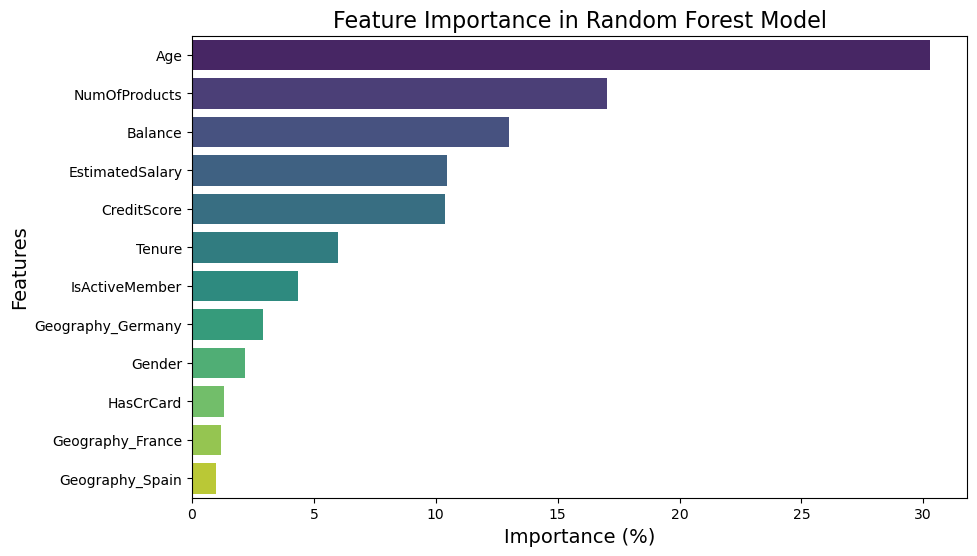

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting sorted feature names and their importance values
features = [feature for feature, _ in sorted_feature_importances]
importances_percent = [round(importance * 100, 2) for _, importance in sorted_feature_importances]

# Creating the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances_percent, y=features, palette='viridis')

# Adding labels and title
plt.title("Feature Importance in Random Forest Model", fontsize=16)
plt.xlabel("Importance (%)", fontsize=14)
plt.ylabel("Features", fontsize=14)

# Displaying the plot
plt.show()

### Conclusions
- In Random Forest Model, the most important features are:  
Age: 30.28%  
NumOfProducts: 17.02%  
Balance: 12.99%  
EstimatedSalary: 10.46%  
CreditScore: 10.38%

- Continuous values are best suited for use of polynomials. For this reason, the set of polynomial features will be reduced by removing NumOfProducts from the obove list.


In [68]:
#feature engineering

# Redefining columns for polynomial feature use in the Random Forest model

from sklearn.preprocessing import PolynomialFeatures

# Defining column categories
categorical_columns = ['Geography']
numerical_columns = ['Tenure', 'NumOfProducts']
boolean_columns = ['HasCrCard', 'IsActiveMember', 'Gender']
polynomial_columns = ['Age', 'Balance', 'EstimatedSalary', 'CreditScore']

# Pipeline for categorical columns (One-Hot Encoding)
cat_pipe = Pipeline(steps=[('ohe', OneHotEncoder())])  

# Pipeline for numerical columns (Standardization)
num_pipe = Pipeline(steps=[('std', StandardScaler())])  

# Pipeline for polynomial features (Standardization + Polynomial Transformation)
poly_pipe = Pipeline(steps=[
    ('std', StandardScaler()),  
    ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False))
])

# Defining the preprocessing steps for different feature types
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_pipe, categorical_columns),   # Processing categorical columns
        ('num', num_pipe, numerical_columns),     # Processing numerical columns
        ('bool', 'passthrough', boolean_columns), # Passing boolean columns without transformation
        ('pol', poly_pipe, polynomial_columns),   # Applying polynomial transformations
    ],
    remainder='drop'
)


In [69]:
# Creating a pipeline for the model  
rf_poly_pipe = Pipeline(steps=[  
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42)) 
])

In [70]:
#fitting the model to the data
rf_poly_pipe.fit(X=features_train_resampled, y=target_train_resampled)

# Saving model
joblib.dump(rf_poly_pipe, '../models/rf_poly_pipe.pkl')

# evaluation of prediction
target_test_pred = rf_poly_pipe.predict(X=features_test_cleaned)
print(classification_report(y_true=target_test, y_pred=target_test_pred))

conf_matrix = confusion_matrix(y_true=target_test, y_pred=target_test_pred)
print("Confusion Matrix:\n", conf_matrix)
roc_auc = roc_auc_score(target_test, rf_poly_pipe.predict_proba(features_test_cleaned)[:, 1])
print("\nroc_auc:", roc_auc)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       809
           1       0.64      0.50      0.56       191

    accuracy                           0.85      1000
   macro avg       0.76      0.72      0.74      1000
weighted avg       0.84      0.85      0.84      1000

Confusion Matrix:
 [[755  54]
 [ 95  96]]

roc_auc: 0.8408124567205328


### Conclusion
- The model's performance with polynomial features is significantly worse than without them.
- It is worth checking whether hyperparameter tuning can improve the results.

In [72]:
# Defining the search space for hyperparameter tuning

search_space_rf_poly = {
    'classifier__n_estimators': np.round(np.geomspace(10, 100, num=6)).astype(int),  # Number of trees
    'classifier__max_depth': np.round(np.geomspace(3, 50, num=10)).astype(int),
    'classifier__min_samples_leaf': [5, 10, 20]  # Minimum number of samples per leaf
}

# Creating a pipeline for the Random Forest model with polynomial features
#rf_poly_pipe = Pipeline(steps=[  
#    ('preprocessor', preprocessor),  # Apply preprocessing transformations to the features  
#    ('classifier', RandomForestClassifier(random_state=42))  # Random Forest classifier  
#])

# Grid search with cross-validation and parallel computation
rf_poly_grid_search = GridSearchCV(
    estimator=rf_poly_pipe,
    param_grid=search_space_rf_poly,
    scoring='f1',  # Optimizing for f1-score
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Utilize all available CPU cores
    verbose=1  # Show progress during training
)

#fitting the model to the data
rf_poly_grid_search.fit(features_train_resampled, target_train_resampled) # Comment out this line and the next one

# saving the GridSearchCV object
joblib.dump(rf_poly_grid_search, '../models/grid_search_results/rf_poly_grid_search.pkl') # Comment out this line and the previous one

# To reduce execution time, you can comment out the two above code lines.
# Then, the GridSearch object saved earlier will be loaded.
# You can also leave the code above as it is to check its functionality.
# approximate execution time: 7m 44sec

Fitting 5 folds for each of 180 candidates, totalling 900 fits


['../models/grid_search_results/rf_poly_grid_search.pkl']

In [73]:
# loading the GridSearchCV object
rf_poly_grid_search = joblib.load('../models/grid_search_results/rf_poly_grid_search.pkl')

# Grid search results:
display(rf_poly_grid_search)

# Printing the best model and its score
print("Best Model:\n", rf_poly_grid_search.best_estimator_)
print("\nBest F1-Score:", rf_poly_grid_search.best_score_)
print("\nBest Parameters:\n", rf_poly_grid_search.best_estimator_.get_params());

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder())]),
                                                                         ['Geography']),
                                                                        ('num',
                                                                         Pipeline(steps=[('std',
                                                                                          StandardScaler())]),
                                                                         ['Tenure',
                                                                          'NumOfProducts']),
                                                                        ('bool',
                                                                         'passthrough',
                                                                         ['HasCrCard',
                                                                          'IsActiveMember',
                                                                          'Gender']),
                                                                        ('pol',
                                                                         Pipeline(steps=[('std',
                                                                                          StandardScaler()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(include_bias=False))]),
                                                                         ['Age',
                                                                          'Balance',
                                                                          'EstimatedSalary',
                                                                          'CreditScore'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': array([ 3,  4,  6,  8, 10, 14, 20, 27, 37, 50]),
                         'classifier__min_samples_leaf': [5, 10, 20],
                         'classifier__n_estimators': array([ 10,  16,  25,  40,  63, 100])},
             scoring='f1', verbose=1)

Best Model:
 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Geography']),
                                                 ('num',
                                                  Pipeline(steps=[('std',
                                                                   StandardScaler())]),
                                                  ['Tenure', 'NumOfProducts']),
                                                 ('bool', 'passthrough',
                                                  ['HasCrCard',
                                                   'IsActiveMember',
                                                   'Gender']),
                                                 ('pol',
                                             

### The main best parameters are:

- max_depth=20,
- n_estimators=100,
- min_samples_leaf= 5,
- min_samples_split=2,

In [74]:
# Save the model
joblib.dump(rf_poly_grid_search.best_estimator_, '../models/rf_poly_after_grid_search.pkl')

# Load the model
model_rf_poly_after_grid_search = joblib.load('../models/rf_poly_after_grid_search.pkl')

In [75]:
# Evaluating model

# Prediction on the test data
target_test_pred = model_rf_poly_after_grid_search.predict(features_test_cleaned)

# Classification report
print(classification_report(target_test, target_test_pred))

# Computing and displaying the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(target_test, target_test_pred))

# Calculating and displaying the ROC AUC score
print("\nROC AUC Score:", roc_auc_score(target_test, model_rf_poly_after_grid_search.predict_proba(features_test_cleaned)[:, 1]))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       809
           1       0.59      0.63      0.61       191

    accuracy                           0.85      1000
   macro avg       0.75      0.76      0.76      1000
weighted avg       0.85      0.85      0.85      1000

Confusion Matrix:
 [[726  83]
 [ 71 120]]

ROC AUC Score: 0.8515004627262668


### Conclusion
- After hyperparameter tuning, the F1-score and other metrics have improved.
- However, the F1-score is slightly lower compared to the rf model without polynomial features.

It is worth investigating whether reducing the number of features can help mitigate overfitting and improve the F1-score.

In [ ]:
# Creating a list of transformed column names and the corresponding DataFrame

# Transforming training data using the preprocessor  
transformed_features_train = preprocessor.fit_transform(features_train_resampled)  

# Transforming test data using the same preprocessor  
transformed_features_test = preprocessor.transform(features_test_cleaned)  

# Extracting feature names after transformation:  
# 1. Extracting OneHotEncoded column names from "Geography"  
geography_columns = preprocessor.transformers_[0][1].named_steps['ohe'].get_feature_names_out(input_features=['Geography'])  

# 2. Extracting polynomial feature names  
polynomial_transformer = preprocessor.transformers_[3][1].named_steps['poly']  
poly_columns = polynomial_transformer.get_feature_names_out(input_features=polynomial_columns)  

# Combining all feature names in the correct order  
all_transformed_columns = list(geography_columns) + numerical_columns + boolean_columns + list(poly_columns)  

# Creating a DataFrame with transformed training data  
transformed_train_df = pd.DataFrame(transformed_features_train, columns=all_transformed_columns)  

# Creating a DataFrame with transformed test data  
transformed_test_df = pd.DataFrame(transformed_features_test, columns=all_transformed_columns)  

# Displaying the transformed test data  
display(transformed_test_df)  


,Geography_France,Geography_Germany,Geography_Spain,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Gender,Age,Balance,...,Age^2,Age Balance,Age EstimatedSalary,Age CreditScore,Balance^2,Balance EstimatedSalary,Balance CreditScore,EstimatedSalary^2,EstimatedSalary CreditScore,CreditScore^2
0,0.0,1.0,0.0,-0.679701,0.743676,0.0,0.0,0.0,-0.863233,0.253035,...,0.745172,-0.218428,0.883883,0.473122,0.064027,-0.259088,-0.138684,1.048416,0.561192,0.300393
1,1.0,0.0,0.0,-1.368720,0.743676,1.0,1.0,0.0,0.172992,-1.324627,...,0.029926,-0.229149,0.136828,-0.047174,1.754636,-1.047712,0.361217,0.625600,-0.215686,0.074362
2,0.0,0.0,1.0,-0.335191,0.743676,1.0,0.0,1.0,0.267194,-1.324627,...,0.071393,-0.353932,-0.195820,-0.132818,1.754636,0.970787,0.658450,0.537108,0.364301,0.247092
3,0.0,1.0,0.0,1.042847,0.743676,1.0,1.0,0.0,1.680228,0.619159,...,2.823167,1.040328,2.037465,-2.463283,0.383358,0.750799,-0.907712,1.470428,-1.777739,2.149276
4,0.0,0.0,1.0,0.698337,-0.761135,1.0,1.0,1.0,-1.334245,0.714493,...,1.780209,-0.953308,-0.321183,1.221188,0.510500,0.171995,-0.653950,0.057947,-0.220325,0.837710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,0.0,-0.679701,0.743676,1.0,0.0,0.0,1.680228,-1.324627,...,2.823167,-2.225675,-2.185296,-1.417891,1.754636,1.722803,1.117810,1.691547,1.097531,0.712114
996,1.0,0.0,0.0,1.042847,0.743676,1.0,0.0,0.0,-0.674829,-1.324627,...,0.455394,0.893896,0.728657,0.094543,1.754636,1.430285,0.185579,1.165892,0.151274,0.019628
997,1.0,0.0,0.0,-0.679701,-0.761135,1.0,0.0,1.0,-1.428447,0.601961,...,2.040461,-0.859869,0.980038,-0.586630,0.362357,-0.412997,0.247211,0.470714,-0.281760,0.168655
998,0.0,0.0,1.0,-0.679701,-0.761135,1.0,0.0,0.0,0.267194,0.125900,...,0.071393,0.033640,-0.144187,-0.538881,0.015851,-0.067940,-0.253918,0.291207,1.088347,4.067549


In [79]:
# Extracting the RandomForestClassifier model from the pipeline
rf_poly_classifier = model_rf_poly_after_grid_search.named_steps['classifier']

# Retrieving feature importance scores from the model
importances = rf_poly_classifier.feature_importances_

# Combining feature names with their respective importance scores
feature_importances_with_names = list(zip(all_transformed_columns, importances))

# Sorting features by importance in descending order
sorted_feature_importances = sorted(feature_importances_with_names, key=lambda x: x[1], reverse=True)

# Displaying sorted features along with their importance scores as percentages
print("Feature Importances:")
for feature, importance in sorted_feature_importances:
    importance_percent = round(importance * 100, 2)  # Convert to percentage
    print(f"{feature}: {importance_percent}%")



Feature Importances:
Age: 17.71%
NumOfProducts: 12.56%
Age Balance: 8.05%
Balance: 5.76%
Balance^2: 4.72%
Age EstimatedSalary: 4.25%
Balance EstimatedSalary: 4.08%
Age CreditScore: 4.06%
EstimatedSalary^2: 3.99%
EstimatedSalary CreditScore: 3.96%
Balance CreditScore: 3.92%
EstimatedSalary: 3.84%
Age^2: 3.82%
CreditScore: 3.78%
CreditScore^2: 3.7%
IsActiveMember: 3.39%
Tenure: 2.49%
Geography_Germany: 2.29%
Gender: 1.5%
Geography_France: 0.91%
Geography_Spain: 0.68%
HasCrCard: 0.57%


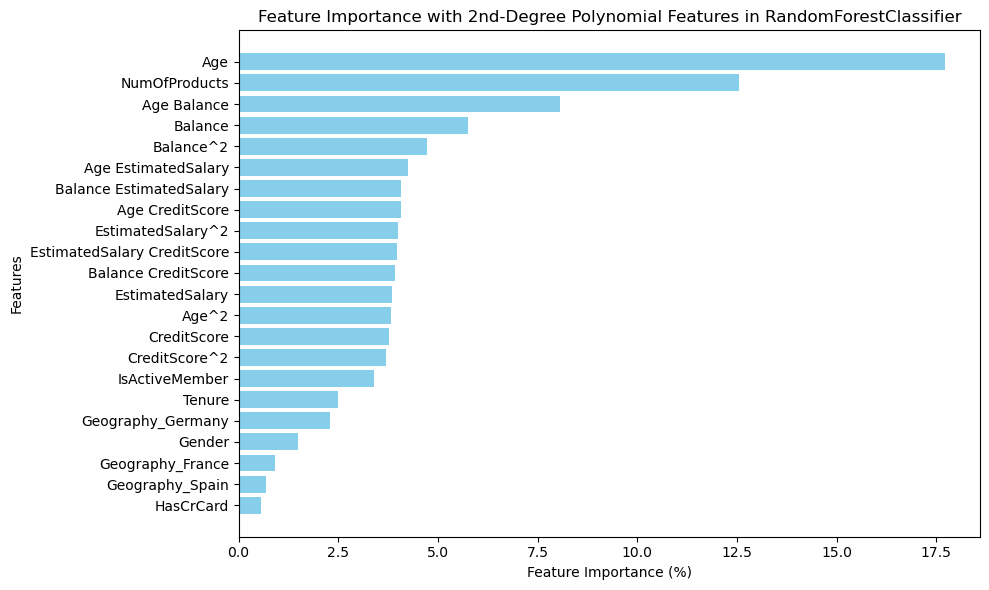

In [81]:
# Extracting feature names and their importance scores from the sorted list
features, importances = zip(*sorted_feature_importances)

# Converting importance scores to percentages
importances_percent = [round(imp * 100, 2) for imp in importances]

# Visualization
plt.figure(figsize=(10, 6))
plt.barh(features, importances_percent, color='skyblue')
plt.xlabel("Feature Importance (%)")
plt.ylabel("Features")
plt.title("Feature Importance with 2nd-Degree Polynomial Features in RandomForestClassifier")
plt.gca().invert_yaxis()  # Invert Y-axis so the most important features appear at the top
plt.tight_layout()
plt.show()


### Conclusions
- As a result of feature engineering using polynomials, the number of features increased from 12 to 22.
- Similarly to previous model, Age and Balance are most imortant features.

To avoid overfitting, the less important features will be removed from the model.
I have decided to delete features with an importance of less than 2%.

In [96]:
# Reducing number of features with importance below 2%

columns_to_keep = [
'Age',
'NumOfProducts',
'Age Balance',
'Balance',
'Balance EstimatedSalary',
'Age EstimatedSalary',
'Balance^2',
'Age CreditScore',
'EstimatedSalary^2',
'Balance CreditScore',
'EstimatedSalary CreditScore',
'EstimatedSalary',
'CreditScore^2',
'CreditScore',
'Age^2',
'Tenure',
'IsActiveMember',
'Geography_Germany',
#'Gender',
#'Geography_France',
#'HasCrCard',
#'Geography_Spain',
]

transformed_reduced_poly_features_test = transformed_test_df[columns_to_keep]
transformed_reduced_poly_features_train = transformed_train_df[columns_to_keep]

# saving data sets to CSV Files

transformed_reduced_poly_features_test.to_csv('../data/processed/transformed_reduced_poly_features_test.csv', index=False)
transformed_reduced_poly_features_train.to_csv('../data/processed/transformed_reduced_poly_features_train.csv', index=False)

In [84]:
display(transformed_reduced_poly_features_train)

,Age,NumOfProducts,Age Balance,Balance,Balance EstimatedSalary,Age EstimatedSalary,Balance^2,Age CreditScore,EstimatedSalary^2,Balance CreditScore,EstimatedSalary CreditScore,EstimatedSalary,CreditScore^2,CreditScore,Age^2,Tenure,IsActiveMember,Geography_Germany
0,-0.015413,-0.761135,-0.002619,0.169899,-0.213351,0.019355,0.028866,0.007033,1.576920,-0.077522,0.572982,-1.255755,0.208196,-0.456285,0.000238,0.009318,1.0,0.0
1,1.115015,-0.761135,0.600897,0.538914,-0.460176,-0.952105,0.290428,1.163015,0.729136,0.562114,-0.890654,-0.853894,1.087951,1.043049,1.243257,1.042847,1.0,0.0
2,-0.298020,0.743676,0.394765,-1.324627,0.486781,0.109518,1.754636,0.245410,0.135045,1.090789,0.302613,-0.367485,0.678101,-0.823469,0.088816,1.042847,0.0,0.0
3,1.209217,-0.761135,1.774191,1.467224,1.686099,1.389603,2.152745,0.743266,1.320606,0.901855,0.706362,1.149176,0.377816,0.614668,1.462205,0.353828,1.0,0.0
4,1.209217,-0.761135,-1.601761,-1.324627,0.555674,-0.507260,1.754636,-2.944441,0.175976,3.225463,1.021469,-0.419495,5.929216,-2.434998,1.462205,1.387357,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14303,0.644003,-0.761135,0.273673,0.424956,0.021496,0.032576,0.180588,-0.103361,0.002559,-0.068205,-0.008118,0.050583,0.025760,-0.160498,0.414740,-1.024210,1.0,1.0
14304,0.078789,-0.761135,0.031522,0.400078,-0.071079,-0.013998,0.160063,0.024321,0.031564,0.123497,-0.054841,-0.177663,0.095284,0.308681,0.006208,0.698337,1.0,1.0
14305,-0.203817,-0.761135,0.269982,-1.324627,-1.379421,-0.212249,1.754636,0.508768,1.084444,3.306527,-2.599454,1.041366,6.230992,-2.496196,0.041542,1.731866,0.0,0.0
14306,-0.392222,-0.761135,-0.438706,1.118514,-1.555936,0.545610,1.251074,-0.213083,1.935087,0.607656,-0.755730,-1.391074,0.295143,0.543271,0.153838,-1.368720,0.0,0.0


In [ ]:
# Defining the search space for hyperparameter tuning  
search_space_rf = {  
    'n_estimators': np.round(np.geomspace(10, 100, num=6)).astype(int),  # Number of trees
    'max_depth': np.round(np.geomspace(3, 50, num=10)).astype(int),# Maximum depth of each tree
    'min_samples_leaf': [5, 10, 20]  # Minimum number of samples per leaf
}  

# Grid search with cross-validation and parallel computation  
rf_reduced_poly_grid_search = GridSearchCV(  
    estimator=RandomForestClassifier(random_state=42),  
    param_grid=search_space_rf,  
    scoring='f1',  # Optimizing for f1-score  
    cv=5,  # 5-fold cross-validation  
    n_jobs=-1,  # Utilize all available CPU cores  
    verbose=1  # Display progress during training  
)  

# Fitting the model using resampled training data  
rf_reduced_poly_grid_search.fit(transformed_reduced_poly_features_train, target_train_resampled) # Comment out this line and the next one

# saving the GridSearchCV object
joblib.dump(rf_reduced_poly_grid_search, '../models/grid_search_results/rf_reduced_poly_grid_search.pkl') # Comment out this line and the previous one

# To reduce execution time, you can comment out the two above code lines.
# Then, the GridSearch object saved earlier will be loaded.
# You can also leave the code above as it is to check its functionality.
# approximate execution time: 8m 23sec

Fitting 5 folds for each of 180 candidates, totalling 900 fits


['../models/grid_search_results/rf_reduced_poly_grid_search.pkl']

In [92]:
# loading the GridSearchCV object
rf_reduced_poly_grid_search = joblib.load('../models/grid_search_results/rf_reduced_poly_grid_search.pkl')

#display(rf_reduced_poly_grid_search) # rf classifier on transformed_reduced_poly_features_train  

# Printing the best model and its score  
print("Best Model:\n", rf_reduced_poly_grid_search.best_estimator_)  
print("\nBest F1 Score:", rf_reduced_poly_grid_search.best_score_)  
print("\nBest Parameters:\n", rf_reduced_poly_grid_search.best_estimator_.get_params())

Best Model:
 RandomForestClassifier(max_depth=np.int64(37), min_samples_leaf=5,
                       n_estimators=np.int64(63), random_state=42)

Best F1 Score: 0.9190168321406288

Best Parameters:
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': np.int64(37), 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': np.int64(63), 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


### The main best parameters are:

- max_depth=37,
- n_estimators=63,
- min_samples_leaf= 5,
- min_samples_split=2,

In [87]:
# Save the model
joblib.dump(rf_reduced_poly_grid_search.best_estimator_, '../models/rf_reduced_poly_after_grid_search.pkl')

# Load the model
model_rf_reduced_poly_grid_search = joblib.load('../models/rf_reduced_poly_after_grid_search.pkl')

In [88]:
# Prediction on the test data
target_test_pred = model_rf_reduced_poly_grid_search.predict(transformed_reduced_poly_features_test)

# Classification report
print(classification_report(target_test, target_test_pred))

# Computing and displaying the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(target_test, target_test_pred))

# Calculating and displaying the ROC AUC score
print("\nROC AUC Score:", roc_auc_score(target_test, model_rf_reduced_poly_grid_search.predict_proba(transformed_reduced_poly_features_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       809
           1       0.55      0.56      0.56       191

    accuracy                           0.83      1000
   macro avg       0.73      0.73      0.73      1000
weighted avg       0.83      0.83      0.83      1000

Confusion Matrix:
 [[723  86]
 [ 84 107]]

ROC AUC Score: 0.8425112769303452


### Conclusion
- After reducing the number of features, the RandomForest Classifier with selected polynomials showed a decrease in the F1-score of the model.

The best prediction results was to observe by RandomForestClassifier without polynomials features.

**The best model with metrics: ROC AUC = 0.86 and f1-score = 62% was Random Forest after hyperparameter tunning, without polynomial features.**


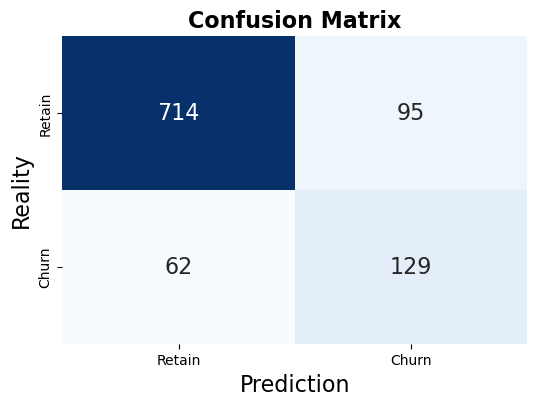

In [ ]:
# Confusion matrix of the best model: Random Forest without Polynomials, after hyperparameter tuning
# (This results ware already presented earlier, but I’ve decided to bring them up again for the purpose of the final summary.)

plt.figure(figsize=(6, 4))  # Figure size
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Retain','Churn'], yticklabels=['Retain','Churn'],
            annot_kws={'size': 16})

# Title and axis labels
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Prediction', fontsize=16)
plt.ylabel('Reality', fontsize=16)
plt.show()



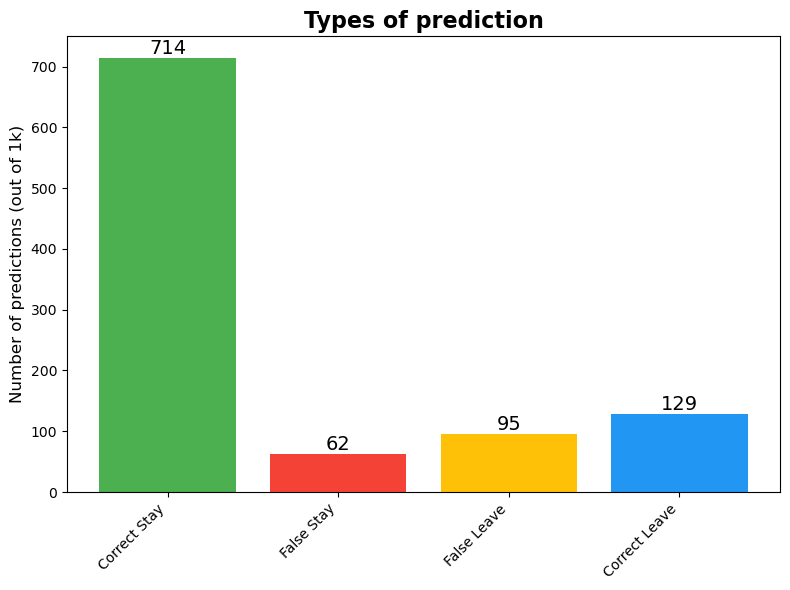

In [93]:
# Presenting results of confusion matrix in colmn chart.

fig, ax = plt.subplots(figsize=(8, 6))

labels = ['Correct Stay', 'False Stay', 'False Leave', 'Correct Leave']
sizes = [conf_matrix_rf[0, 0], conf_matrix_rf[1, 0], conf_matrix_rf[0, 1], conf_matrix_rf[1, 1]]
colors = ['#4CAF50', '#F44336', '#FFC107', '#2196F3']

ax.bar(labels, sizes, color=colors)

plt.title('Types of prediction', fontsize=16, fontweight='bold')
#plt.xlabel('Type of prediction', fontsize=12)
plt.ylabel('Number of predictions (out of 1k)', fontsize=12)

# Adding values on the columns
for i, v in enumerate(sizes):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=14)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [94]:
print(class_report_rf)

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       809
           1       0.58      0.68      0.62       191

    accuracy                           0.84      1000
   macro avg       0.75      0.78      0.76      1000
weighted avg       0.85      0.84      0.85      1000



### Interpretation and final comments:

The best model with metrics: F1-score = 62% and ROC AUC = 0.86 is **Random Forest**, without using polynomial features.  

Its hyperparameters are:  
- max_depth=20,
- n_estimators=100,
- min_samples_leaf= 5,
- min_samples_split=2

**Results of the best model:**  
84% of all predictions (for both retainers and cjurners) are correct.  
58% of predicted churn cases are correct.  
The best model's predictions capture 68% of actual churners.  

To find the best model parameters, the F1-score was used.   
It was the solution that ensured a good balance between precision and recall.   
However, depending on the banking strategy, solutions that maximize either recall or precision should also be considered.

Since data related to bank customers is sensitive, it is not publicly available. For this reason, no real-world data was used in the analysis and forecasting. Consequently, this analysis should not be interpreted as a universal reflection of actual customer behavior. In the case of this dataset, where only slight dependencies existed between individual features, the quality of predictive models is limited. However, the primary goal of this project was to highlight possible approaches within the broader topic of customer churn.